# Tamil Handwritten Character Recognition - Model Training

## Import Libraries

In [ ]:
import os
import gc
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

## Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Point to Working Directory

In [ ]:
%cd /content/drive/MyDrive/AI/train

/content/drive/MyDrive/AI/train


## Data Preprocessing

### Extract Target Classes

In [ ]:
# Train Folder
path_train = "/content/drive/MyDrive/AI/train"
# Test Folder
path_test = "/content/drive/MyDrive/AI/test"
# List all the directories under Train folder to intuitively extract all the character classes
dir_list = os.listdir(path_train)
# Convert String classes to integer classes
classes = [eval(i) for i in dir_list]
classes.sort()
classes=np.array(classes)
classes

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155])

### Save the classes as strings in a copy for future use

In [ ]:
directories = np.array(list(map(str, classes)))

### Preprocessing of Train Set

In [ ]:
# X_train, y_train = np.array([]),np.array([])
X_train, y_train = [],[]
# Iterate through all the classes under train
for dir in directories:
  # Extract the images
  img_path = os.path.join(path_train,dir)
  # Iterate through all the images under each class
  for img in os.listdir(img_path):
      try:
          # Read the image
          img_arr = cv2.imread(os.path.join(img_path, img))
          # Normalize the image and resize it to 128x128 dimension
          img_arr = (cv2.resize(img_arr,(128,128))/255.0).astype(np.float32)
          # img_arr = (img_arr/255.0).astype(np.float32)
          # X_train = np.append(X_train,img_arr)
          # y_train = np.append(y_train,int(dir))
          X_train.append(img_arr)
          y_train.append(int(dir))
          # gc.collect()
      except Exception as e:
          print(e)

### Preprocessing of Test Set

In [ ]:
# X_test, y_test = np.array([]),np.array([])
X_test, y_test = [],[]
# Iterate through all the classes under test
for dir in directories:
  # Extract the images
  img_path = os.path.join(path_test,dir)
  # Iterate through all the images under each class
  for img in os.listdir(img_path):
      try:
          # Read the image
          img_arr = cv2.imread(os.path.join(img_path, img))
          # Normalize the image and resize it to 128x128 dimension
          img_arr = (cv2.resize(img_arr,(128,128))/255.0).astype(np.float32)
          # img_arr = (img_arr/255.0).astype(np.float32)
          # X_test = np.append(X_test,img_arr)
          # y_test = np.append(y_test,int(dir))
          X_test.append(img_arr)
          y_test.append(int(dir))
      except Exception as e:
          print(e)

### Plot a character sample from train set

0


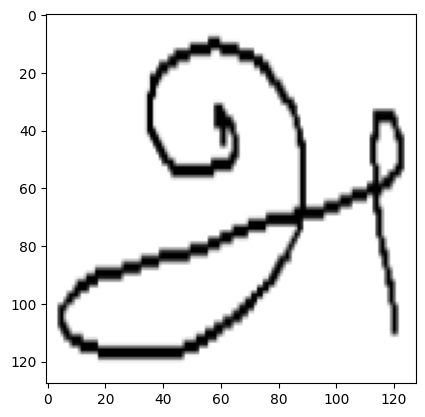

In [ ]:
plt.imshow(X_train[0])
print(y_train[0])

### NumPy array conversion of Train and Test set

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [ ]:
np.save("/content/drive/MyDrive/AI/data/X_train.npy", X_train) # Save the train set nparray as an npy file
np.save("/content/drive/MyDrive/AI/data/X_test.npy", X_test) # Save the test set nparray as an npy file

## Model Definition

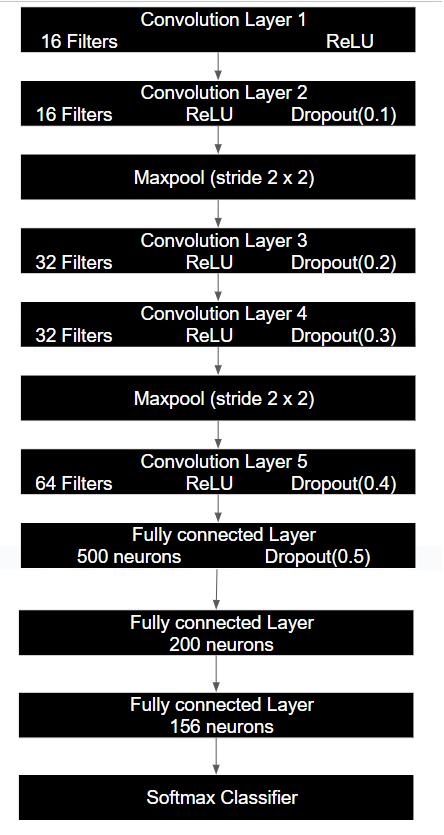

In [ ]:
model = Sequential()

model.add(Conv2D(16 , (3,3) , activation = 'relu' , input_shape = (128,128,3)))
model.add(Conv2D(16 , (3,3) , activation = 'relu'))
model.add(Dropout(0.1))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32 , (3,3) , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Conv2D(32 , (3,3) , activation = 'relu'))
model.add(Dropout(0.3))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(units = 500 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 200 , activation = 'relu'))
model.add(Dense(units = 156 , activation = 'softmax'))

model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 124, 16)      2320      
                                                                 
 dropout_5 (Dropout)         (None, 124, 124, 16)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 dropout_6 (Dropout)         (None, 60, 60, 32)        0         
                                                      

In [ ]:
gc.collect()

3667

### Convert the target class vectors for train and test sets

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
np.save("/content/drive/MyDrive/AI/data/y_train.npy", y_train) # Save as npy file
np.save("/content/drive/MyDrive/AI/data/y_test.npy", y_test) # Save as npy file

## Model Training

In [ ]:
history = model.fit(X_train, y_train , epochs = 20)

Epoch 1/20
1584/1584 [==============================] - 16s 8ms/step - loss: 2.6547 - accuracy: 0.3449
Epoch 2/20
1584/1584 [==============================] - 13s 8ms/step - loss: 1.1242 - accuracy: 0.6605
Epoch 3/20
1584/1584 [==============================] - 13s 8ms/step - loss: 0.7840 - accuracy: 0.7536
Epoch 4/20
1584/1584 [==============================] - 13s 8ms/step - loss: 0.6063 - accuracy: 0.8059
Epoch 5/20
1584/1584 [==============================] - 13s 8ms/step - loss: 0.5071 - accuracy: 0.8342
Epoch 6/20
1584/1584 [==============================] - 13s 8ms/step - loss: 0.4357 - accuracy: 0.8557
Epoch 7/20
1584/1584 [==============================] - 13s 8ms/step - loss: 0.3811 - accuracy: 0.8745
Epoch 8/20
1584/1584 [==============================] - 13s 8ms/step - loss: 0.3507 - accuracy: 0.8838
Epoch 9/20
1584/1584 [==============================] - 13s 8ms/step - loss: 0.3287 - accuracy: 0.8906
Epoch 10/20
1584/1584 [==============================] - 13s 8ms/step - l

### Model Evaluation

In [ ]:
model.evaluate(X_test,y_test)

842/842 [==============================] - 4s 5ms/step - loss: 0.5934 - accuracy: 0.8353


[0.5934420228004456, 0.8352521657943726]

### Save Model Architecture and Trained Weights

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/AI/model/model_30.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/AI/model/model_weights_30.h5")
model.save("/content/drive/MyDrive/AI/model/model_30.h5")
print("Saved model to disk")

Saved model to disk


## Confusion Matrix- Evaluation of Predicted Classes

In [ ]:
predictions = model.predict(X_test)
predictions = np.array([np.argmax(i) for i in predictions])

842/842 [==============================] - 3s 3ms/step


In [ ]:
cm = confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,171,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,166,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,1,158,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,157,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,160,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0,0,0,0,0,0,0,0,0,0,...,0,2,3,0,1,152,1,1,0,0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,13,0,2,0,86,0,0,0
153,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,3,0,163,0,0
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,10,0,1,135,0


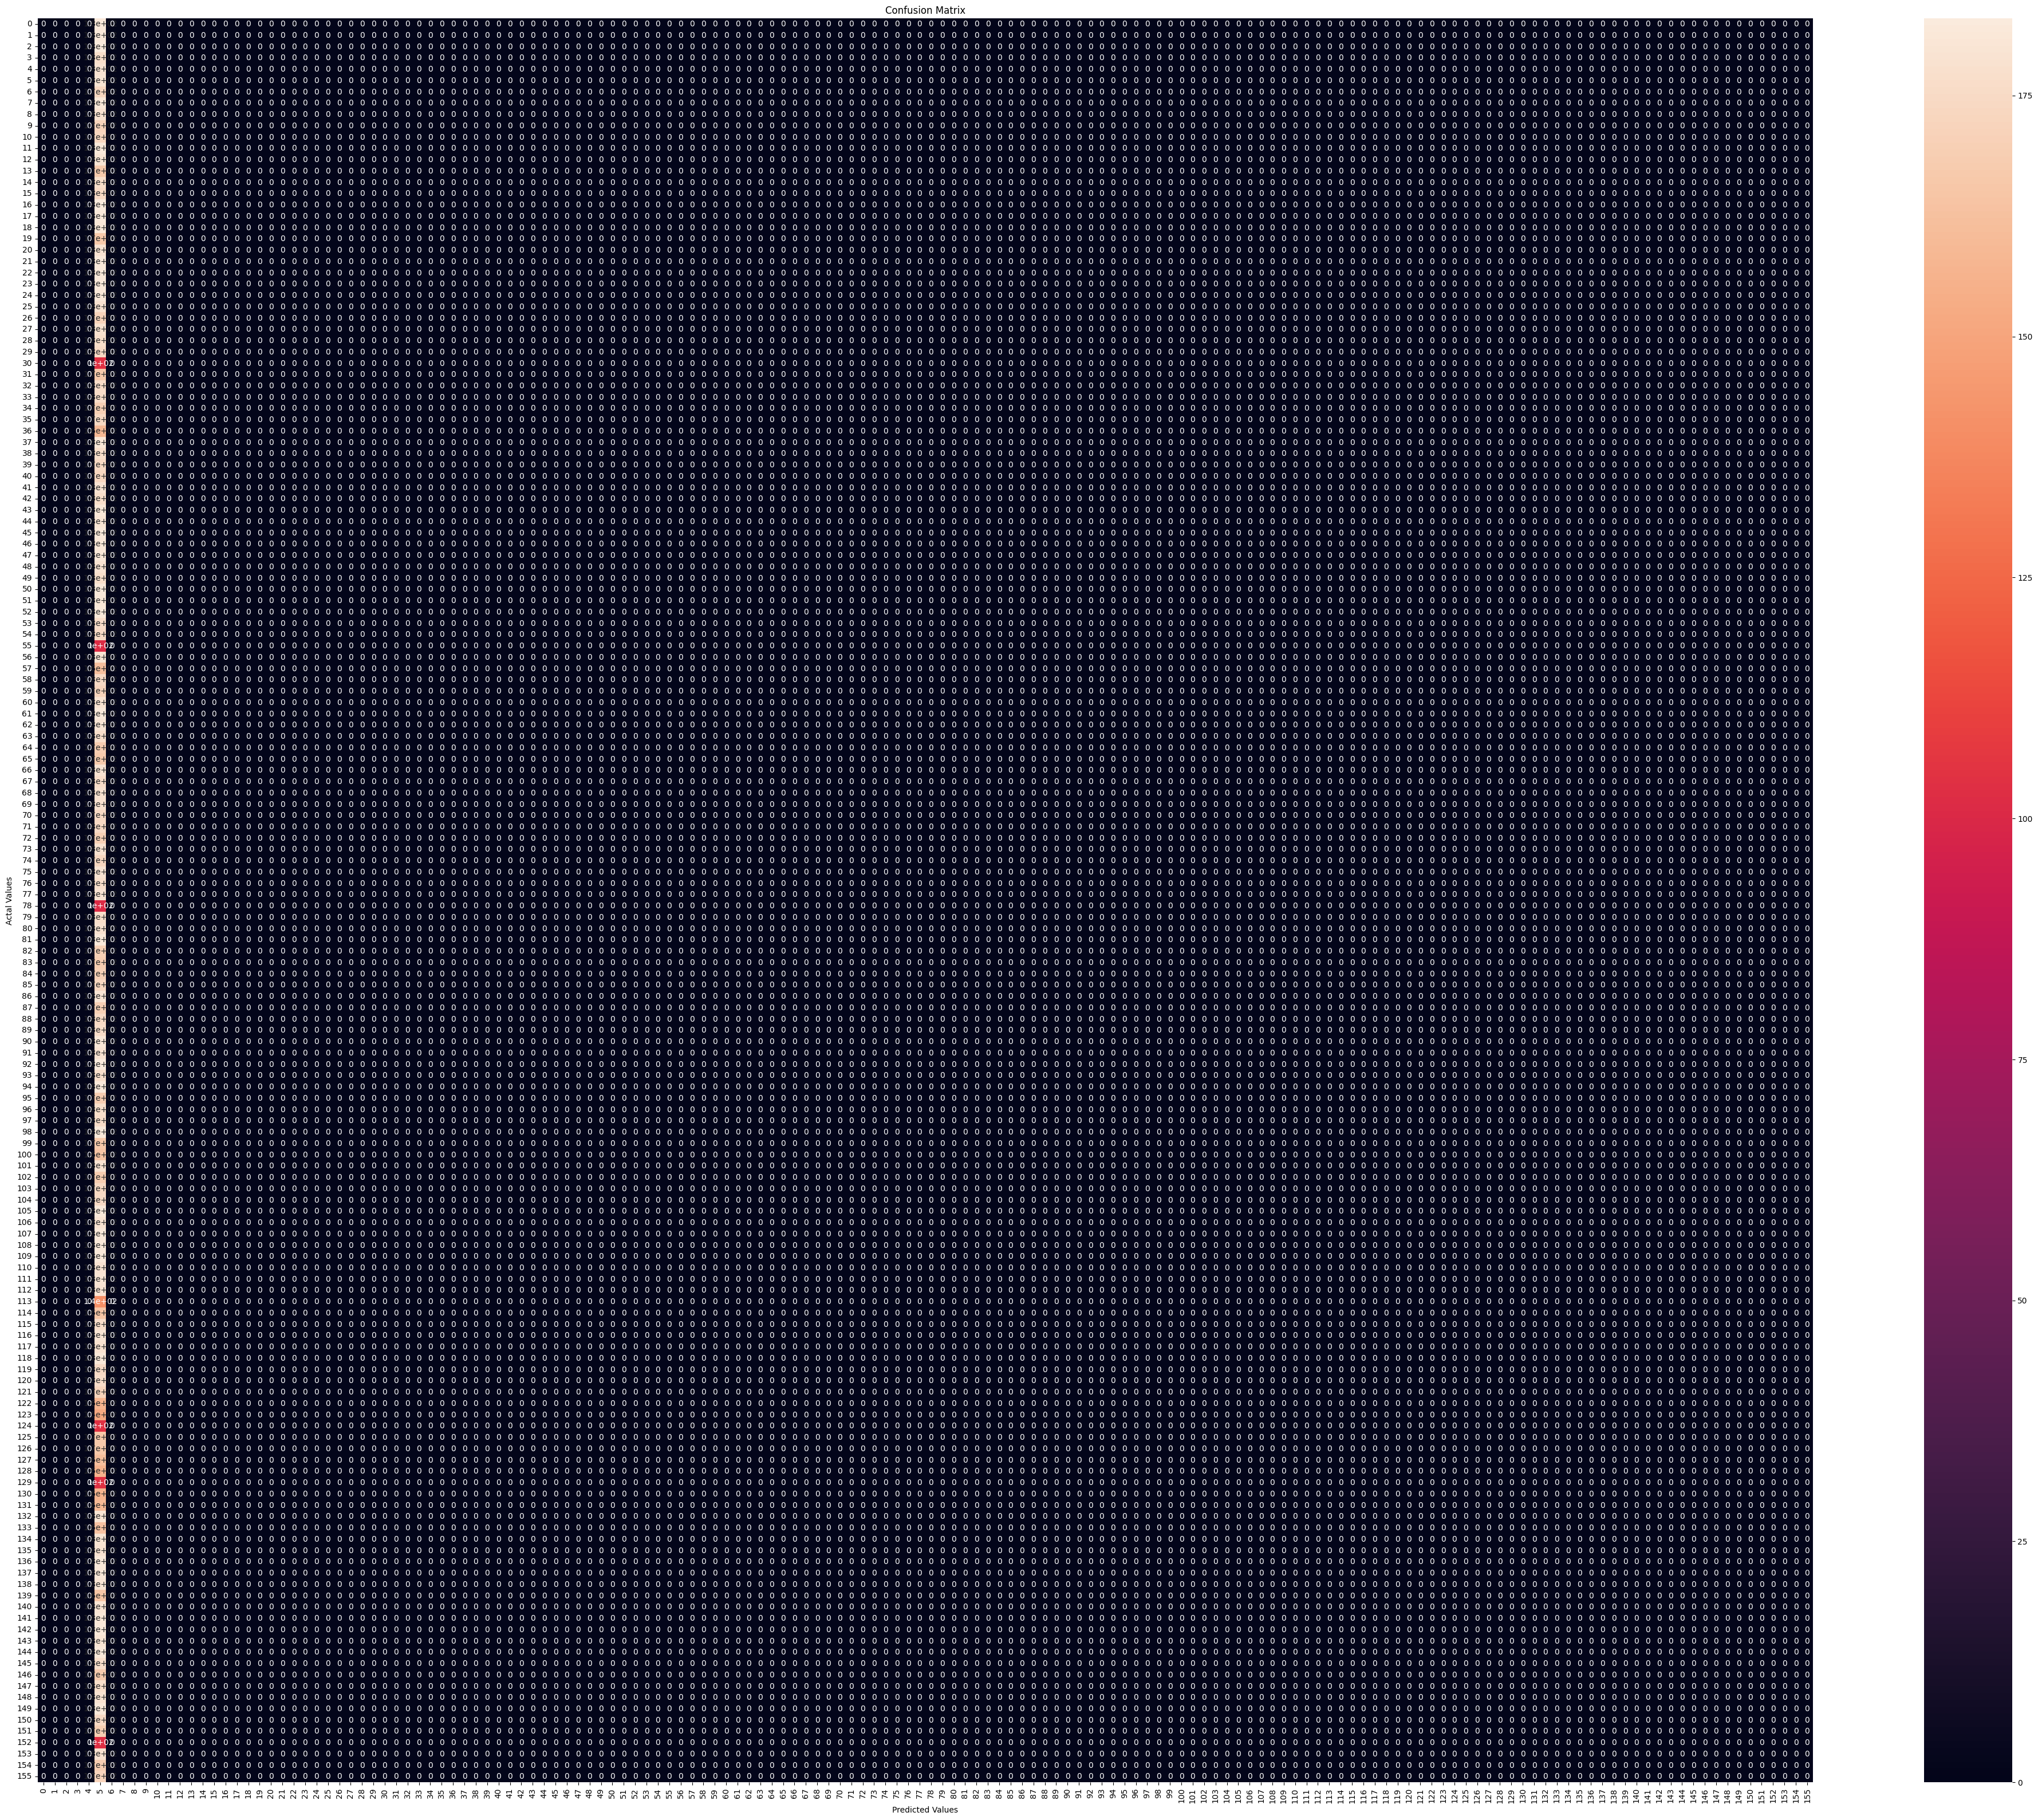

In [ ]:
plt.figure(figsize=(50,40))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Learning and Loss Growth Rate Visualization

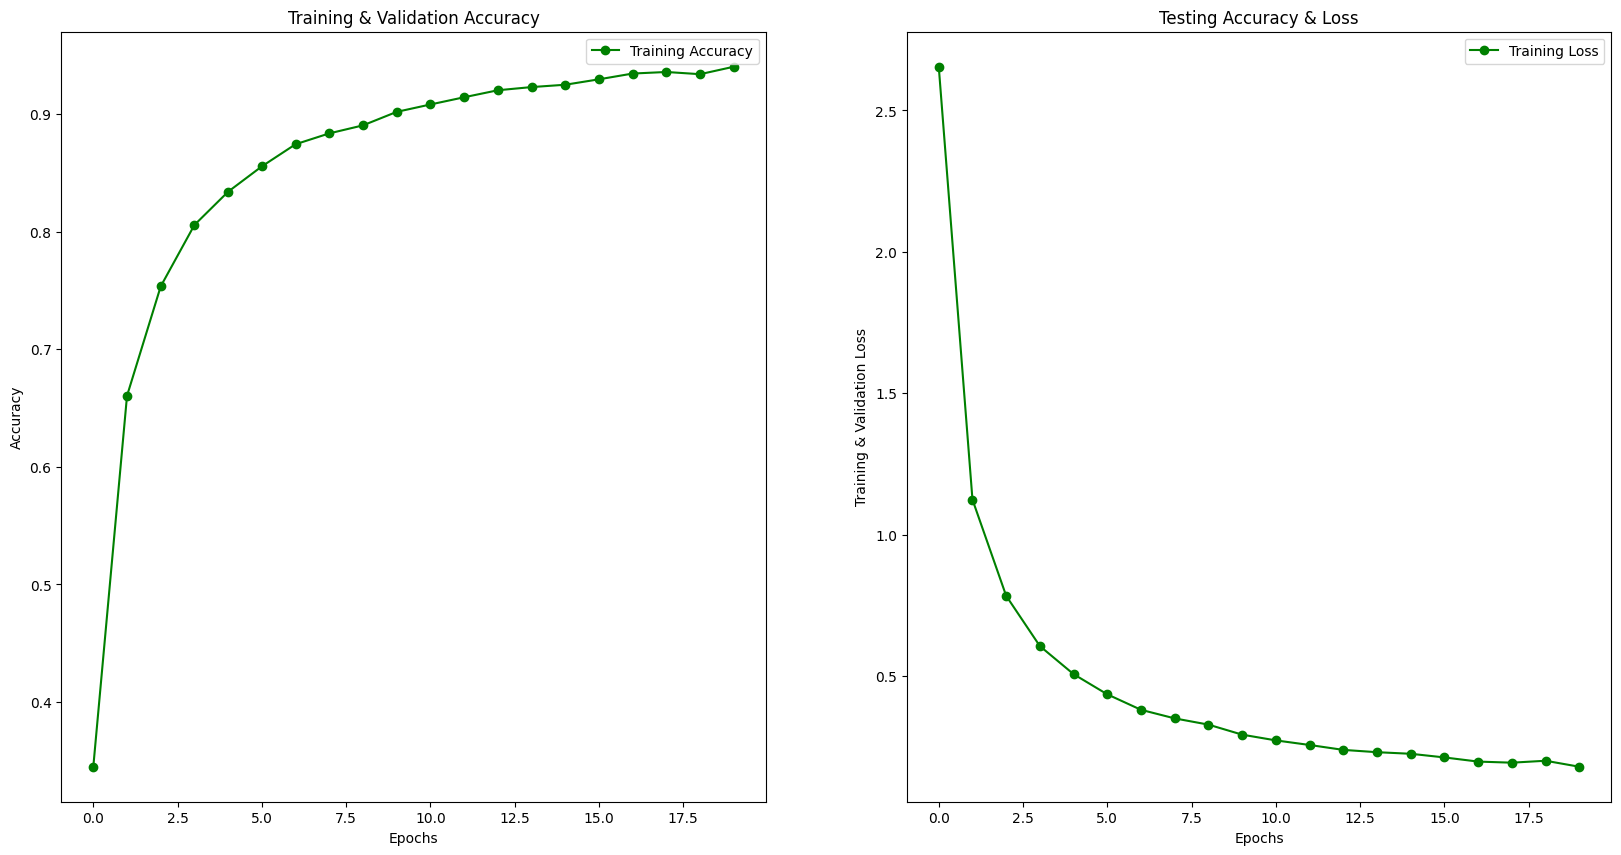

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
#val_acc = history.history['val_accuracy']
#val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
# ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
# ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()